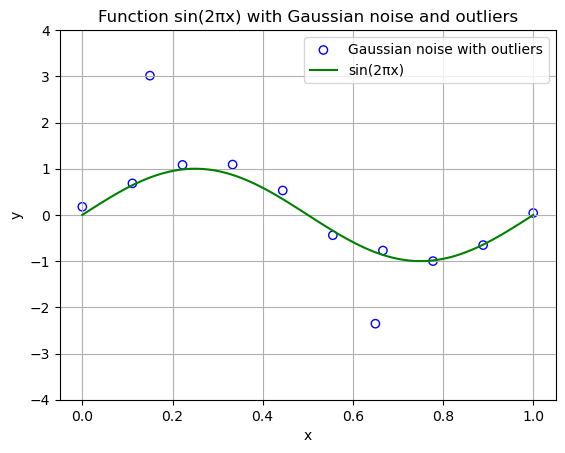

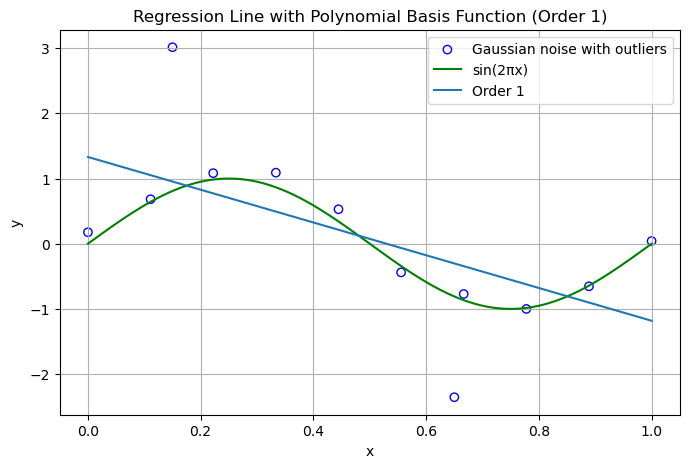

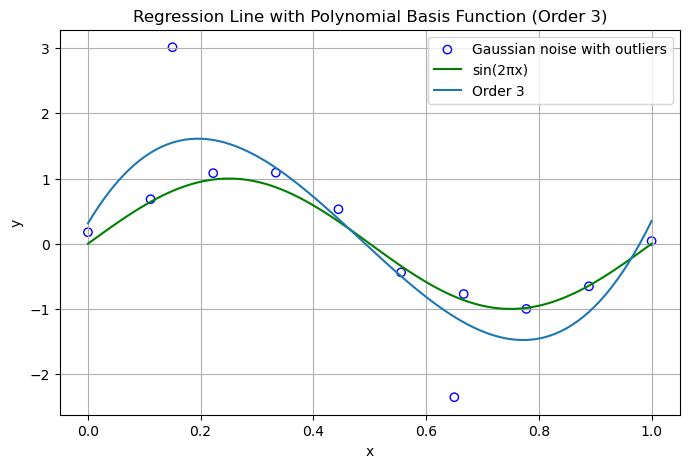

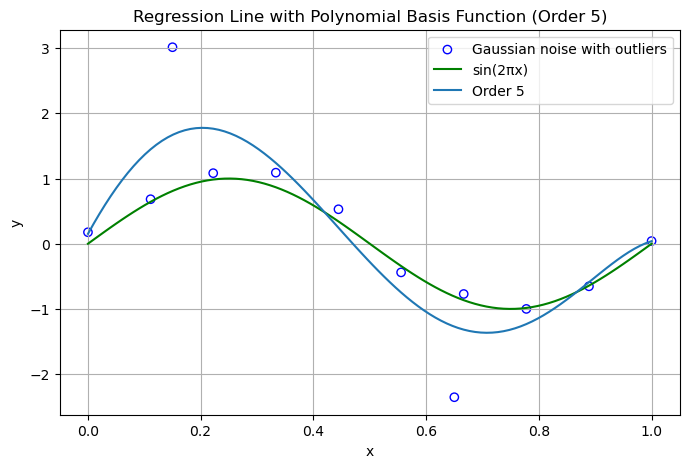

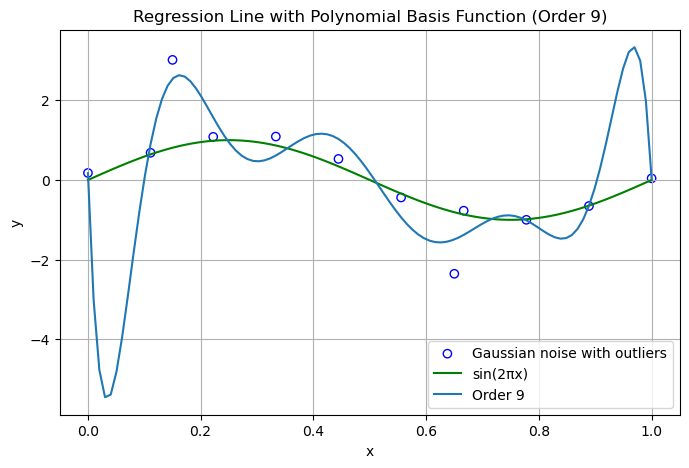

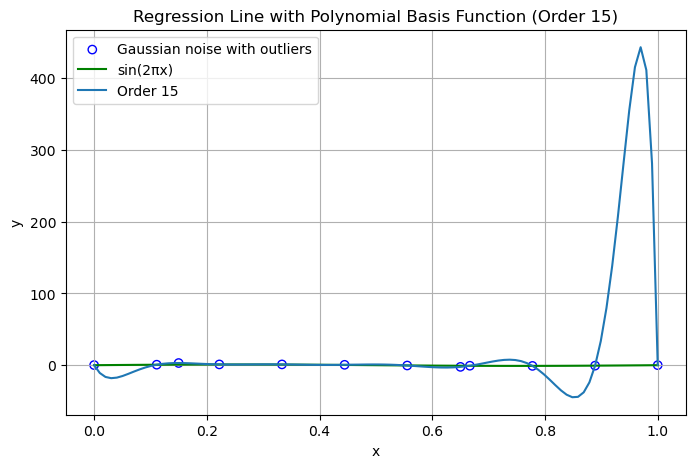

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

np.random.seed(0)
x = np.linspace(0, 1, 10) 
y_function = np.sin(2 * np.pi * x)

x_outliers = np.array([0.15, 0.65])
y_outliers = np.array([3.0, -2.5])
x = np.concatenate([x, x_outliers])
y_noisy_function = np.concatenate([y_function, y_outliers])

gaussian_noise = np.random.normal(0, 0.1, size=x.shape)
y_noisy_function += gaussian_noise

plt.scatter(x, y_noisy_function, label='Gaussian noise with outliers', color='none', edgecolors='blue')
plt.plot(np.linspace(0, 1, 100), np.sin(2 * np.pi * np.linspace(0, 1, 100)), color='green', label='sin(2πx)')
plt.title('Function sin(2πx) with Gaussian noise and outliers')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.ylim(-4, 4)
plt.grid(True)
plt.show()

def gen_regression_line(x, y, order):
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, label='Gaussian noise with outliers', color='none', edgecolors='blue')
    plt.plot(np.linspace(0, 1, 100), np.sin(2 * np.pi * np.linspace(0, 1, 100)), color='green', label='sin(2πx)')

    poly_features = PolynomialFeatures(degree=order, include_bias=False)
    X_poly = poly_features.fit_transform(x.reshape(-1, 1))
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)
    y_pred = lin_reg.predict(poly_features.transform(np.linspace(0, 1, 100).reshape(-1, 1)))
    plt.plot(np.linspace(0, 1, 100), y_pred, label='Order ' + str(order))

    plt.title('Regression Line with Polynomial Basis Function (Order ' + str(order) + ')')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

orders = [1, 3, 5, 9, 15]

for order in orders:
    gen_regression_line(x, y_noisy_function, order)